In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


In [4]:
data=pd.read_csv(r"C:\Users\L E N O V O\OneDrive\Desktop\datas\titanic.csv")
data.head()
data.dropna(inplace=True)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [6]:

# Preprocess the data
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'] = data['Age'].fillna(data['Age'].median())
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression(max_iter=200, solver='saga')
model.fit(X_train, y_train)

# Manual implementation of the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate the linear combination (z) and apply the sigmoid function
z_train = np.dot(X_train, model.coef_.T) + model.intercept_
y_train_proba = sigmoid(z_train)

z_test = np.dot(X_test, model.coef_.T) + model.intercept_
y_test_proba = sigmoid(z_test)

# Make predictions based on the probabilities
y_pred = (y_test_proba >= 0.5).astype(int)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.0
Confusion Matrix:
[[ 8  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [23]:

# Set seed for reproducibility
np.random.seed(42)

# Generate time series data
date_range = pd.date_range(start='2020-01-01', periods=1000, freq='D')

# Generate categorical data
categories = ['A', 'B', 'C', 'D']
categorical_data = np.random.choice(categories, size=1000)

# Generate numerical features
feature_1 = np.random.randn(1000) * 10
feature_2 = np.random.randn(1000) * 20 + 50
feature_3 = np.random.randn(1000) * 5 - 20

# Generate target variable (4 classes as strings)
target = np.random.choice(['class_0', 'class_1', 'class_2', 'class_3'], size=1000)

# Create DataFrame
df = pd.DataFrame({
    'date': date_range,
    'category': categorical_data,
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'target': target
})

# Display first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Split data into features and target
X = df.drop(columns=['date', 'target'])
y = df['target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)




        date category  feature_1  feature_2  feature_3   target
0 2020-01-01        C   3.417560  76.034826 -21.152004  class_1
1 2020-01-02        D  18.761708  81.230224 -24.621166  class_3
2 2020-01-03        A   9.504238  50.640083 -15.549008  class_2
3 2020-01-04        C  -5.769037  34.931643 -14.823753  class_2
4 2020-01-05        C  -8.984147  59.199443 -29.230939  class_2
date         0
category     0
feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64


In [24]:
print(y)

[1 3 2 2 2 3 1 0 1 3 3 0 3 2 2 2 2 2 3 0 0 2 3 1 1 3 2 0 3 1 1 1 2 1 3 3 1
 3 1 1 0 2 2 0 0 2 1 1 2 1 0 1 1 3 3 3 1 2 0 1 2 1 0 1 0 1 0 1 0 3 1 1 2 2
 0 1 0 3 2 0 0 2 1 0 2 1 3 2 0 3 1 1 2 2 2 1 3 1 0 1 0 3 2 2 1 2 3 2 1 3 0
 1 0 3 1 1 3 2 1 1 0 2 0 0 2 2 3 2 1 2 3 3 3 2 2 0 0 1 0 1 3 0 2 0 1 0 3 2
 1 2 2 1 2 2 0 2 2 2 2 1 3 0 2 2 1 3 2 1 0 0 2 2 3 3 2 1 3 2 3 2 0 2 0 3 2
 3 0 2 3 0 3 1 0 0 0 2 2 2 1 1 0 1 3 0 0 3 0 1 2 3 1 3 3 0 0 1 3 0 0 3 1 1
 3 1 0 3 0 2 2 1 2 0 2 0 1 1 0 2 1 3 1 2 3 2 0 3 2 3 2 3 2 0 3 3 3 3 0 3 1
 0 1 3 2 1 3 1 3 3 3 2 1 0 0 0 0 3 1 1 2 1 1 1 2 0 1 2 2 3 2 0 1 2 0 2 2 2
 2 2 0 1 1 1 1 0 3 3 0 0 2 2 2 1 2 3 1 2 1 3 2 3 3 3 2 0 2 3 2 3 0 1 0 0 1
 2 1 2 2 3 3 1 0 1 2 3 1 1 3 3 3 2 3 0 1 3 3 2 2 1 0 1 3 0 0 0 0 1 2 2 3 2
 2 2 2 3 1 0 2 1 2 2 0 0 0 2 2 2 0 3 1 3 2 2 3 2 1 2 1 3 3 2 1 2 0 0 0 0 2
 0 1 3 3 0 0 0 2 3 0 1 0 3 0 3 0 1 0 1 1 0 1 2 0 0 1 1 0 2 1 1 3 2 2 0 2 0
 3 2 1 3 0 3 0 3 0 2 1 0 3 0 0 0 3 1 2 1 0 3 1 0 2 2 2 0 3 1 2 0 0 1 2 0 1
 3 3 3 2 1 1 0 0 0 1 0 1 

In [33]:
# One-hot encode the categorical feature
# Scale the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['feature_1', 'feature_2', 'feature_3']),
        ('cat', OneHotEncoder(), ['category'])
    ])
print(preprocessor)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train)
(y_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['feature_1', 'feature_2', 'feature_3']),
                                ('cat', OneHotEncoder(), ['category'])])


array([1, 0, 2, 1, 3, 1, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 3, 1, 0, 3, 0,
       1, 1, 2, 2, 3, 3, 3, 0, 1, 3, 3, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1,
       0, 3, 0, 3, 2, 2, 1, 0, 3, 1, 3, 0, 1, 0, 0, 3, 2, 3, 1, 3, 1, 0,
       0, 0, 2, 0, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 1, 3, 2, 1, 3,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 3, 0, 3, 3, 1, 3, 1, 0,
       0, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 1, 0, 1, 3, 2, 1, 3, 2, 1, 1,
       2, 3, 1, 1, 0, 2, 3, 1, 1, 0, 3, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 3,
       2, 3, 1, 0, 2, 1, 1, 2, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 3, 3, 1, 3,
       2, 2, 2, 3, 1, 0, 3, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 0, 1, 0, 2,
       3, 2, 1, 0, 0, 2, 2, 3, 1, 3, 1, 3, 0, 0, 2, 3, 1, 2, 1, 0, 0, 3,
       3, 2, 3, 3, 1, 2, 0, 1, 2, 0, 2, 3, 3, 3, 2, 3, 0, 3, 2, 1, 1, 3,
       3, 2, 2, 1, 1, 3, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 3, 0, 2,
       2, 1, 1, 1, 0, 0, 3, 2, 2, 3, 2, 2, 0, 1, 2, 2, 3, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 1, 0, 2, 0, 1, 3, 3, 0, 0, 1, 2,

In [29]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.32      0.30        50
           1       0.23      0.08      0.12        59
           2       0.21      0.27      0.24        51
           3       0.24      0.33      0.28        40

    accuracy                           0.24       200
   macro avg       0.24      0.25      0.23       200
weighted avg       0.24      0.24      0.23       200

Confusion Matrix:
 [[16  8 14 12]
 [17  5 29  8]
 [ 9  7 14 21]
 [14  2 11 13]]


c:\Users\L E N O V O\machine-learning\machinelearn\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



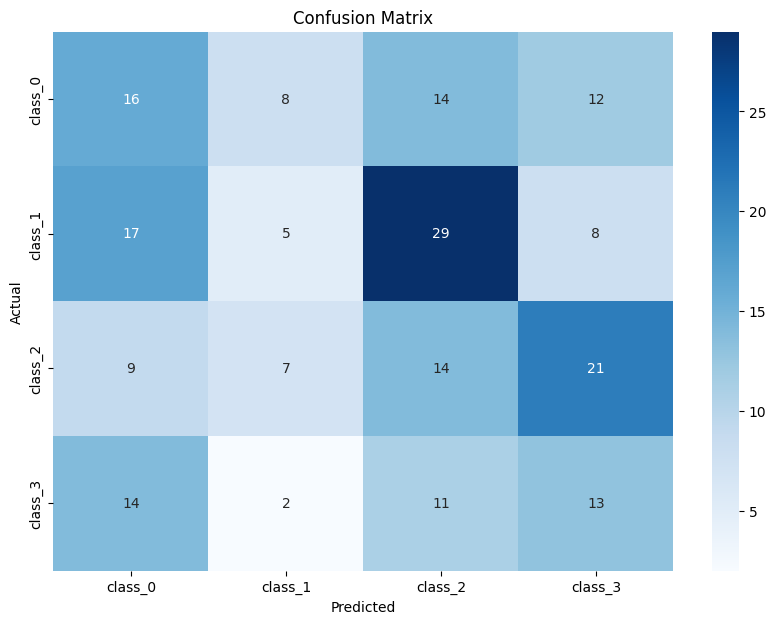

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objs as go

# Binarize the target variable for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
fig = go.Figure()

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'Class {class_name} (AUC={auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Chance'))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [32]:
# Retrieve the model's coefficients (weights)
weights = model.coef_

# Create a DataFrame for visualization
weights_df = pd.DataFrame(weights, columns=preprocessor.get_feature_names_out())

# Plot the weights
fig = px.line(weights_df.T, title='Trained Weights of Logistic Regression Model')
fig.show()
